<a href="https://colab.research.google.com/github/dyjdlopez/dsp/blob/main/notebooks/dsp_05v01_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 05: Image Manipulation
$_{\text{©D.J. Lopez | 2022 | Digital Signals Processing}}$

In this laboratory we will be doing basic operations on images. Specifically we will look at:
* Channel Splicing
* Channel Manipulation
* Exposure Control
* Image Noises


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/dyjdlopez/dsp.git

Cloning into 'dsp'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 28 (delta 5), reused 9 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [ ]:
dir  = 'dsp/data/img/'

# Colored and Grayscale

In [ ]:
## Import the Lenna Image as test image
image = cv2.imread(dir+'lenna.png') ## 3 Channels - BGR
gray = cv2.imread(dir+'lenna.png',0)

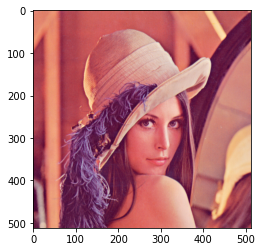

In [ ]:
def rgb(image): return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb(image))
plt.show()

# Image Channels and Manipulation

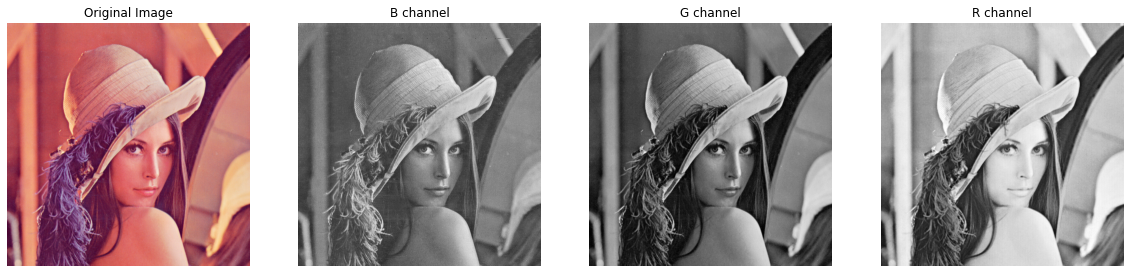

In [ ]:
## Channel Splitting
b,g,r = cv2.split(image)

plt.figure(figsize=(20,16))
plt.subplot(141)
plt.title("Original Image")
plt.imshow(rgb(image))
plt.axis("off")

plt.subplot(142)
plt.title("B channel")
plt.imshow(b+25, cmap='gray')
plt.axis("off")

plt.subplot(143)
plt.title("G channel")
plt.imshow(g, cmap='gray')
plt.axis("off")

plt.subplot(144)
plt.title("R channel")
plt.imshow(r, cmap='gray')
plt.axis("off")

plt.show()

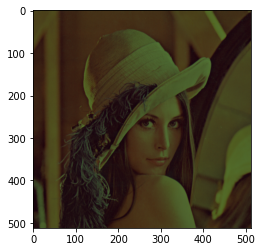

In [ ]:
img_merge = cv2.merge([r//3,g//2,b//4])
plt.imshow(img_merge)
plt.show()

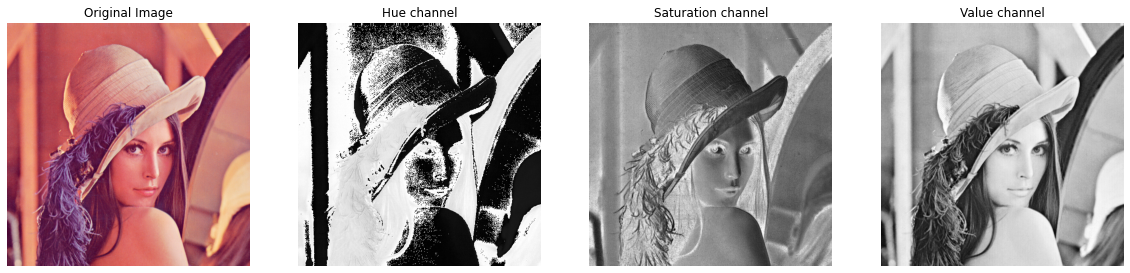

In [ ]:
## Trying a different image encoding
img_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(img_hsv)

plt.figure(figsize=(20,16))
plt.subplot(141)
plt.title("Original Image")
plt.imshow(rgb(image))
plt.axis("off")

plt.subplot(142)
plt.title("Hue channel")
plt.imshow(h, cmap='gray')
plt.axis("off")

plt.subplot(143)
plt.title("Saturation channel")
plt.imshow(s, cmap='gray')
plt.axis("off")

plt.subplot(144)
plt.title("Value channel")
plt.imshow(v, cmap='gray')
plt.axis("off")

plt.show()

# Controlling Exposure

## Gamma Correction Algorithm
Contrast adjustment can be achieved using the [Gamma Correction](https://www.cambridgeincolour.com/tutorials/gamma-correction.htm) algorithm. Long story short, gamma correction uses the power-law to adjust the intensity of a channel. To obtain the gamma-corrected image we used the following expression::
$$I' = 255 \times \begin{pmatrix}\frac{I}{255}\end{pmatrix}^{\frac{1}{\gamma}}$$

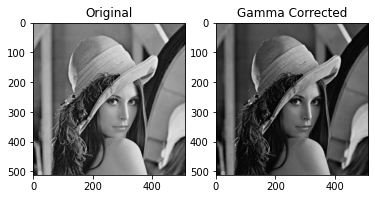

In [ ]:
#@title Try out adjusting the gamma
gamma =  0.5#@param {type:"number"}
inv_gamma = 1.0/gamma
corrected_img = 255 * np.power(gray/255,inv_gamma)
plt.subplot(121), plt.title('Original'), plt.imshow(gray, cmap='gray')
plt.subplot(122), plt.title('Gamma Corrected'),plt.imshow(corrected_img, cmap='gray')
plt.show()

#### *Histogram Equalization*
Another fundamental image processing operation is [Histogram Equalization](https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html). This technique uses the intensity distribution of an image and 'stretch' it to improve contrast along channels.<br>
Check out:
* [cv2.equalizeHist](https://docs.opencv.org/3.4/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e)
* [cv2.calcHist](https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d)
* [cv2.split](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga8027f9deee1e42716be8039e5863fbd9)

* [cv2.merge](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga61f2f2bde4a0a0154b2333ea504fab1d)

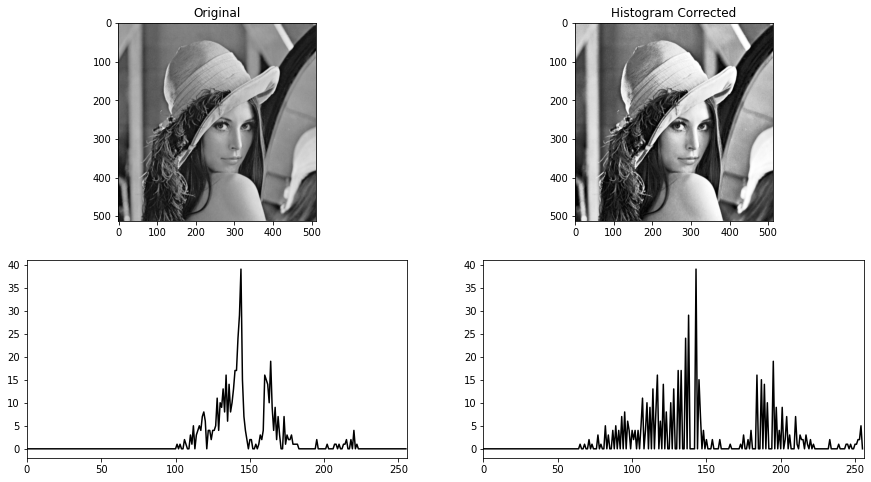

In [ ]:
hist_img = cv2.equalizeHist(gray)

plt.figure(figsize=(15,8))
plt.subplot(221), plt.title('Original'), plt.imshow(gray, cmap='gray')
plt.subplot(223)
hist = cv2.calcHist(gray, [0], None, [256], [0, 256]) 
plt.plot(hist, color='black') 
plt.xlim([0, 256])

plt.subplot(222), plt.title('Histogram Corrected'),plt.imshow(hist_img, cmap='gray')
ehist = cv2.calcHist(hist_img, [0], None, [256], [0, 256]) 
plt.subplot(224)
plt.plot(ehist, color='black') 
plt.xlim([0, 256])
plt.show()

In [ ]:
## RGB Histogram Equalization
plt_img = rgb(image)
ch_rgb = cv2.split(plt_img)
colors = ("r", "g", "b")
equ_rgb= []
for channel in ch_rgb:
    equ_rgb.append(cv2.equalizeHist(channel))
hequ_rgb = cv2.merge(equ_rgb)

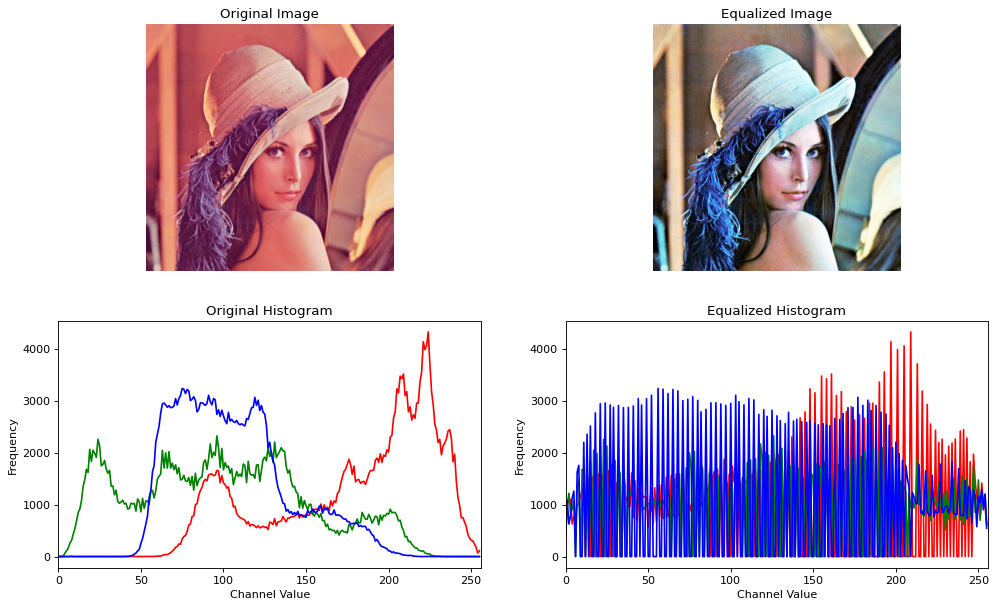

In [ ]:
plt.figure(figsize=(15, 9), dpi=80) 
plt.subplot(221) 
plt.imshow(plt_img) 
plt.title("Original Image") 
plt.axis('off') 
plt.subplot(223) 
plt.title("Original Histogram") 
plt.xlabel("Channel Value") 
plt.ylabel("Frequency") 

for (channel, color) in zip(ch_rgb, colors): 
  hist = cv2.calcHist([channel], [0], None, [256], [0, 256]) 
  plt.plot(hist, color=color) 
  plt.xlim([0, 256])

plt.subplot(222) 
plt.imshow(hequ_rgb) 
plt.title("Equalized Image") 
plt.axis('off') 
plt.subplot(224) 
plt.title("Equalized Histogram") 
plt.xlabel("Channel Value") 
plt.ylabel("Frequency") 
for (equ_channel, color) in zip(equ_rgb, colors): 
  hist = cv2.calcHist([equ_channel], [0], None, [256], [0, 256]) 
  plt.plot(hist, color=color) 
  plt.xlim([0, 256]) 
plt.show()

In [ ]:
## HSV Histogram Equalization
ch_hsv = cv2.split(img_hsv)
ch_hsv_eq = ch_hsv[0], ch_hsv[1], cv2.equalizeHist(ch_hsv[2])
hequ_hsv = cv2.merge(ch_hsv_eq)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


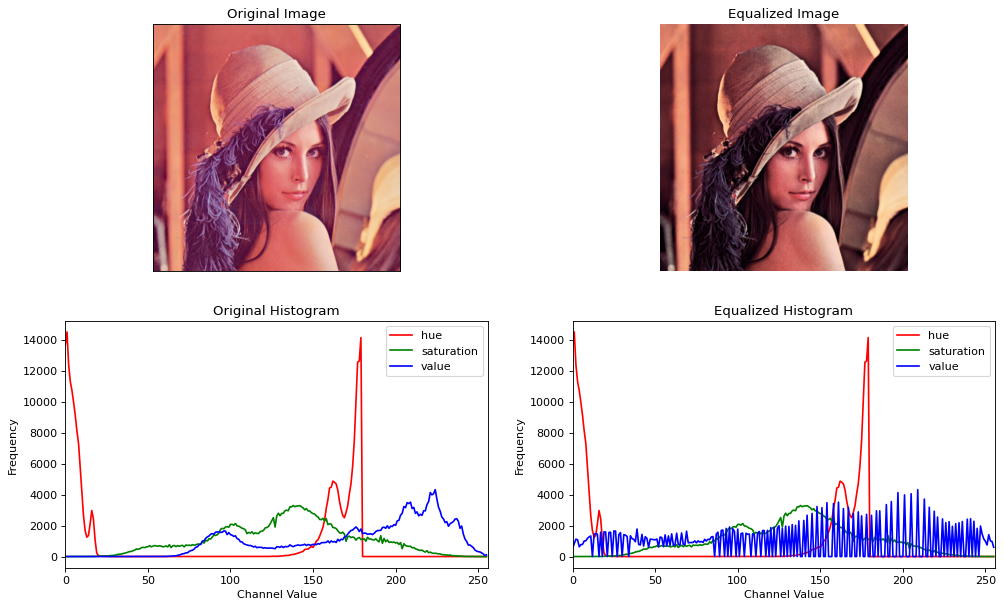

In [ ]:
plt.figure(figsize=(15, 9), dpi=80) 
plt.subplot(221), plt.title('Original Image'), plt.xticks([]), plt.yticks([]), plt.imshow(plt_img)
plt.subplot(222), plt.title('HSV Histogram Equalization'), plt.xticks([]), plt.yticks([]), plt.imshow(cv2.cvtColor(hequ_hsv,cv2.COLOR_HSV2RGB))
plt.subplot(223) 
plt.title("Original Histogram") 
plt.xlabel("Channel Value") 
plt.ylabel("Frequency") 

labels = ("hue","saturation","value")
for (channel, color, label) in zip(ch_hsv, ('r','g','b'),labels): 
  hist = cv2.calcHist([channel], [0], None, [256], [0, 256]) 
  plt.plot(hist, color=color, label=label) 
  plt.xlim([0, 256])
plt.legend()
plt.subplot(222) 
plt.imshow(cv2.cvtColor(hequ_hsv,cv2.COLOR_HSV2RGB)) 
plt.title("Equalized Image") 
plt.axis('off') 
plt.subplot(224) 
plt.title("Equalized Histogram") 
plt.xlabel("Channel Value") 
plt.ylabel("Frequency") 
for (equ_channel, color, label) in zip(ch_hsv_eq, ('r','g','b'),labels): 
  hist = cv2.calcHist([equ_channel], [0], None, [256], [0, 256]) 
  plt.plot(hist, color=color, label=label) 
  plt.xlim([0, 256]) 
plt.legend()

plt.show()

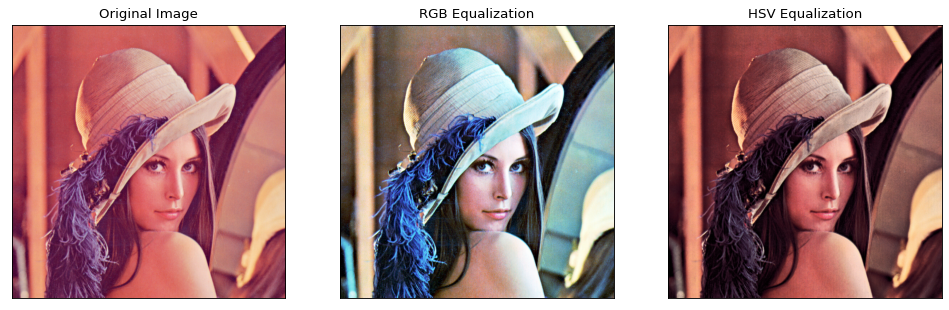

In [ ]:
plt.figure(figsize=(15, 9), dpi=80) 
plt.subplot(131), plt.title('Original Image'), plt.xticks([]), plt.yticks([]), plt.imshow(plt_img)
plt.subplot(132), plt.title('RGB Equalization'), plt.xticks([]), plt.yticks([]), plt.imshow(hequ_rgb)
plt.subplot(133), plt.title('HSV Equalization'), plt.xticks([]), plt.yticks([]), plt.imshow(cv2.cvtColor(hequ_hsv,cv2.COLOR_HSV2RGB))
plt.show()